In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import pickle
import import_ipynb
import sys
sys.path.append('./../../')
import Portfolio_value as pv

In [2]:
df =  pd.read_csv('./../../data/data.csv')

In [3]:
p_val = np.load('./../../result/p_val/p_val_const.npy', allow_pickle=True)
w_val = np.load('./../../result/w_val/w_val_const.npy', allow_pickle=True)

p_val = p_val.reshape(1)
p_val = p_val[0]

w_val = w_val.reshape(1)
w_val = w_val[0]

In [4]:
normal_year = np.load('./../../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]


In [5]:
normal_perform = {}
for k in list(np.arange(0,11)/10):
    for withdraw_rate in [0.04, 0.06, 0.08]:
        for upper_year in [20, 25, 30]:
            normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)] = {
                'dep':[],
                'max':[],
                'under':[],
                'inc':[],
                'beq':[],
                'total':[],
                'dep_time':[]
            }

In [6]:
init_wealth = 350000

for k in list(np.arange(0,11)/10):
    for withdraw_rate in [0.04, 0.06, 0.08]:
        for upper_year in [20, 25, 30]:
            for years in normal_year[upper_year]:
                for year in years:
                    res = pv.get_metric(year, k, upper_year, withdraw_rate, df, init_wealth, p_val, w_val)
                    if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                        normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['dep'].append(100)
                    elif res[2] >= upper_year*12: # 고갈이 안되면
                        normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['dep'].append(0)
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['max'].append(res[3])
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['under'].append(res[4])
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['inc'].append(res[1])
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['beq'].append(res[0])
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['total'].append(res[1] + res[0])
                    normal_perform['k{}_w{}_y{}'.format(k, withdraw_rate, upper_year)]['dep_time'].append(res[2])



In [7]:
x = []
inc = []
avg = []
for kk in ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8']:
    for item in list(normal_perform.keys()):
        if item.split('_')[0].split('k')[1] == kk:
            avg.append(np.mean(normal_perform[item]['total']))
        
    print('k:', kk)
    print(np.round(np.mean(avg),3))
    x.append(int(float(kk)*100))
    inc.append(np.round(np.mean(avg),3))

k: 0.2
109.562
k: 0.3
110.047
k: 0.4
110.296
k: 0.5
110.368
k: 0.6
110.143
k: 0.7
109.635
k: 0.8
108.878


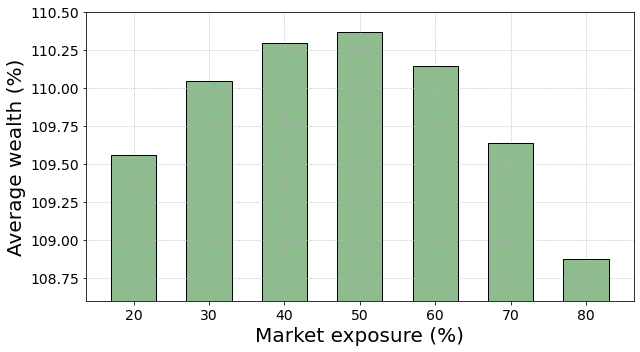

In [8]:
plt.figure(figsize=(9,5))

# create a bar chart
plt.bar(x, inc, width=6, color="darkseagreen", edgecolor="black")

# set the limit for y-axis
plt.ylim(108.6, 110.5)

# set x and y axis labels
plt.xlabel('Market exposure (%)', size=20)
plt.ylabel('Average wealth (%)', size=20)


# show the plot
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=14)

plt.grid(True, linestyle=":")
plt.tight_layout()
plt.savefig("./optimal_k.eps", format="eps", bbox_inches="tight")
plt.show()

